## Below are results of taking first learning CSV, using simple EDA and building a linear regression predicition model for DURATION

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [35]:
# load
df = pd.read_csv('learning.csv')
print('Training data shape: ', df.shape)
#df.head()
df.describe()

('Training data shape: ', (18340, 7))


,changedFiles,additions,deletions,duration,pullRequestReviews,reviewRequests
count,18340.000000,18340.000000,18340.000000,1.834000e+04,18340.000000,18340.000000
mean,9.799128,482.536205,278.157797,3.083619e+05,1.071974,0.326772
std,66.920217,10595.377424,6553.998420,1.136347e+06,3.429161,0.702432
min,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.099750e+03,0.000000,0.000000
50%,2.000000,16.000000,5.000000,4.721450e+04,0.000000,0.000000
75%,5.000000,80.000000,23.000000,2.458115e+05,1.000000,0.000000
max,2807.000000,860038.000000,550313.000000,3.604603e+07,124.000000,7.000000


In [10]:
# Extract the EXT_SOURCE variables and show correlations
ext_data_corrs = df.corr()
ext_data_corrs

,changedFiles,additions,deletions,duration,pullRequestReviews,reviewRequests
changedFiles,1.000000,0.374927,0.238807,0.002681,0.032538,0.015575
additions,0.374927,1.000000,0.047370,0.018571,0.040747,0.012206
deletions,0.238807,0.047370,1.000000,0.004102,0.014648,-0.001860
duration,0.002681,0.018571,0.004102,1.000000,0.047348,-0.021880
pullRequestReviews,0.032538,0.040747,0.014648,0.047348,1.000000,0.052829
reviewRequests,0.015575,0.012206,-0.001860,-0.021880,0.052829,1.000000


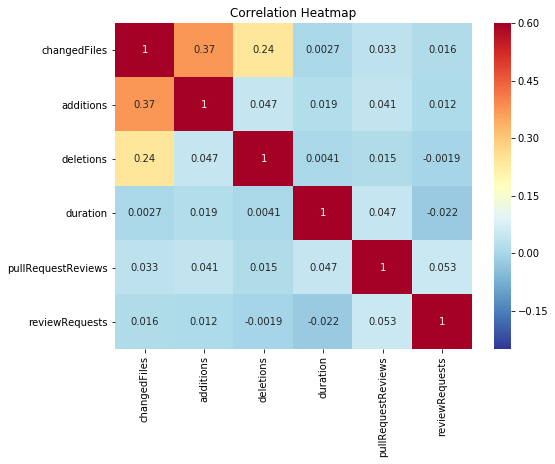

In [4]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [70]:
#file input
learning = pd.read_csv('learning.csv')

#features
feature_cols = ['changedFiles','additions','deletions','pullRequestReviews','reviewRequests']
#feature_cols = ['deletions','pullRequestReviews']

#feature harness
X = learning.loc[:, feature_cols]

#target harness
Y = learning.duration

#model fit
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
# copy row from learning
Xnew = [[55,2428,292,0,1]]
# prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[55, 2428, 292, 0, 1], Predicted=263478.294487


In [73]:
### fake new data
Xnew,_ = make_regression(n_samples=3, n_features=5, noise=0.1, random_state=1)
#predict
ynew = model.predict(Xnew)
#print inputs with predictions
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-1.07296862 -0.52817175 -0.61175641  1.62434536  0.86540763], Predicted=295808.526299
X=[-0.38405435 -0.3224172  -2.06014071  1.46210794  1.13376944], Predicted=282494.555763
X=[ 0.3190391  -0.7612069   1.74481176 -2.3015387  -0.24937038], Predicted=277437.789422


In [74]:
#https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
# Cross Validation Regression MAE
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)") % (results.mean(), results.std())

# Cross Validation Regression MSE
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

# Cross Validation Regression R^2
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)") % (results.mean(), results.std())

MAE: -400306.937 (30287.522)
MSE: -1288268437736.512 (528178334937.388)
R^2: 0.001 (0.005)


## Below are results from new learning file (learning2) It includes:
- Reforecast of duration, using new days scale, in linear regression model from above
- Classficiation predicition model for new "size" classifier

In [ ]:
## Linear Regression on new Duration scale

In [4]:
# load
df = pd.read_csv('learning2.csv')
print('Training data shape: ', df.shape)
#df.head()
df.describe()

('Training data shape: ', (19934, 12))


,changedFiles,additions,deletions,pullRequestReviews,reviewRequests,dayOfWeek,duration
count,19934.000000,19934.000000,19934.000000,19934.000000,19934.000000,19934.000000,19934.000000
mean,9.880606,479.421892,282.141818,1.040584,0.340724,2.159878,3.291813
std,69.603210,10635.680462,6657.313537,3.354415,0.718624,1.580266,13.624111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,15.000000,5.000000,0.000000,0.000000,2.000000,0.000000
75%,5.000000,78.000000,23.000000,1.000000,0.000000,3.000000,2.000000
max,2869.000000,860038.000000,550313.000000,124.000000,7.000000,6.000000,426.000000


In [5]:
# Extract the EXT_SOURCE variables and show correlations
ext_data_corrs = df.corr()
ext_data_corrs

,changedFiles,additions,deletions,pullRequestReviews,reviewRequests,dayOfWeek,duration
changedFiles,1.000000,0.418103,0.269021,0.028261,0.011511,0.022600,0.001119
additions,0.418103,1.000000,0.043115,0.038239,0.009987,0.004308,0.015812
deletions,0.269021,0.043115,1.000000,0.012811,-0.002195,0.004517,0.003606
pullRequestReviews,0.028261,0.038239,0.012811,1.000000,0.044857,-0.016395,0.042426
reviewRequests,0.011511,0.009987,-0.002195,0.044857,1.000000,0.010033,-0.023427
dayOfWeek,0.022600,0.004308,0.004517,-0.016395,0.010033,1.000000,0.017831
duration,0.001119,0.015812,0.003606,0.042426,-0.023427,0.017831,1.000000


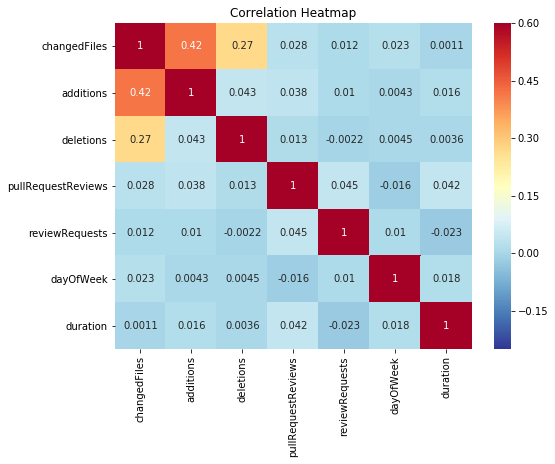

In [8]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')
plt.show();

In [9]:
#file input
learning = pd.read_csv('learning2.csv')

#features
feature_cols = ['changedFiles','additions','deletions','pullRequestReviews','dayOfWeek','reviewRequests']
#feature_cols = ['deletions','pullRequestReviews']

#feature harness
X = learning.loc[:, feature_cols]

#target harness
Y = learning.duration

#model fit
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Cross Validation Regression MAE
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)") % (results.mean(), results.std())

# Cross Validation Regression MSE
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

# Cross Validation Regression R^2
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)") % (results.mean(), results.std())

MAE: -4.612 (0.351)
MSE: -185.239 (64.653)
R^2: 0.001 (0.005)


In [ ]:
##classification - multi-model

In [6]:
# load and visualize
learning = pd.read_csv('learning2.csv')
print(learning.shape)
print(learning.groupby('size').size())

#drop string columns
learning2 = learning.drop(learning.columns[[0, 7, 8, 9,10]], axis=1)

print('Training data shape: ', learning2.shape)
#df.head()
learning2.describe()

#histograms

#learning.hist()
#plt.show()

#scatter plot matrix 

#scatter_matrix(learning)
#plt.show()

(19934, 12)
size
large      2757
medium     1960
small     15217
dtype: int64
('Training data shape: ', (19934, 7))


,changedFiles,additions,deletions,pullRequestReviews,reviewRequests,dayOfWeek
count,19934.000000,19934.000000,19934.000000,19934.000000,19934.000000,19934.000000
mean,9.880606,479.421892,282.141818,1.040584,0.340724,2.159878
std,69.603210,10635.680462,6657.313537,3.354415,0.718624,1.580266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000
50%,2.000000,15.000000,5.000000,0.000000,0.000000,2.000000
75%,5.000000,78.000000,23.000000,1.000000,0.000000,3.000000
max,2869.000000,860038.000000,550313.000000,124.000000,7.000000,6.000000


In [8]:
# Split-out validation dataset
array = learning2.values
X = array[:,0:6]
Y = array[:,6]
Y=Y.astype('string')
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [9]:
#multi-model evaluation

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

#model evaluation
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto'))) - this was taking too long to run and I already had good results from other models
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.763342 (0.009586)
LDA: 0.763655 (0.010001)
KNN: 0.705903 (0.012402)
CART: 0.665204 (0.008972)
NB: 0.755943 (0.009175)


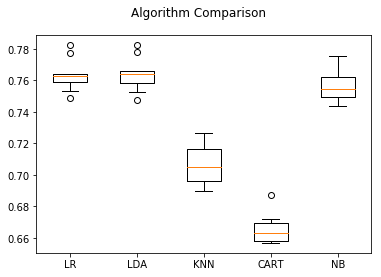

In [10]:
# Compare Algorithms
#CART is the best with perfect score - most likely overfit
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [11]:
#chose LDA because of high score
# Make predictions on validation dataset
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.764735390018
[[   5    0  551]
 [   6    0  374]
 [   5    2 3044]]
             precision    recall  f1-score   support

      large       0.31      0.01      0.02       556
     medium       0.00      0.00      0.00       380
      small       0.77      1.00      0.87      3051

avg / total       0.63      0.76      0.67      3987



In [14]:
Xnew = [[4,6,4,0,2,3],[29,339,165,10,0,4]]

# Make predictions on spoof dataset
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(Xnew)

for i in range(len(predictions)):
 print(i, predictions[i])

#confirmed that predicted values = real values

(0, 'small')
(1, 'small')
